Importanje svega

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

Nesto za device

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Podaci i izbacivanje misssing values

In [3]:
#data = pd.read_csv('..\Know center zadatak za vjezbu\df_nno2_new.csv', )
data = pd.read_csv(r'C:\Users\kpavlovic\OneDrive - know-center.at\erasmus_2022\data\df_nno2_new.csv', 
                   index_col=0)

* <font color='red'>prvo provjeriti ima li missing values</font>

In [4]:
data.isnull().sum()#.sum()

N_NO2                 0
Nord_Precip           0
Nord_Pressure         0
Nord_RH               0
Nord_Temp             0
Nord_Winddirection    0
Nord_Windspeed        0
weekday_Monday        0
weekday_Tuesday       0
weekday_Wednesday     0
weekday_Thursday      0
weekday_Friday        0
weekday_Saturday      0
weekday_Sunday        0
season_fall           0
season_spring         0
season_summer         0
season_winter         0
holiday_sunday        0
holiday               0
holiday_school        0
year                  0
month                 0
dayofyear             0
weekday               0
season                0
dtype: int64

* <font color='red'>nema, idemo dalje</font>

In [5]:
#data = data.dropna(axis=0)
data

,N_NO2,Nord_Precip,Nord_Pressure,Nord_RH,Nord_Temp,Nord_Winddirection,Nord_Windspeed,weekday_Monday,weekday_Tuesday,weekday_Wednesday,...,season_summer,season_winter,holiday_sunday,holiday,holiday_school,year,month,dayofyear,weekday,season
2010-01-01,37.758297,0.0,953.79370,77.251884,4.035931,89.42938,0.999700,0,0,0,...,0,1,0,1,1,2010,1,1,5,1
2010-01-02,25.938934,0.0,950.12506,81.564156,3.522331,110.14704,0.791805,0,0,0,...,0,1,0,0,1,2010,1,2,6,1
2010-01-03,11.074873,0.0,961.61456,56.786457,3.109104,227.58770,3.743496,0,0,0,...,0,1,0,0,1,2010,1,3,0,1
2010-01-04,18.268064,0.0,974.15820,49.110626,-0.742807,242.49976,1.280200,1,0,0,...,0,1,0,0,1,2010,1,4,1,1
2010-01-05,41.781490,0.0,972.75420,69.331055,-3.867371,134.32390,0.704452,0,1,0,...,0,1,0,0,1,2010,1,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-03,14.935202,0.0,977.16940,67.474310,18.020380,167.51172,0.476324,0,0,0,...,1,0,0,0,0,2021,7,184,6,3
2021-07-04,8.624179,0.0,976.34150,58.300950,21.290035,150.60567,0.629011,0,0,0,...,1,0,0,0,0,2021,7,185,0,3
2021-07-05,16.112087,0.0,973.71210,68.143060,19.866663,107.73452,0.646504,1,0,0,...,1,0,0,0,0,2021,7,186,1,3
2021-07-06,7.977263,0.0,973.59030,66.033400,21.587740,120.35903,0.852469,0,1,0,...,1,0,0,0,0,2021,7,187,2,3


* <font color='red'>laksi nacin za definiranje X: samo izbacis kolonu koja se predicta ako nam sve ostale trebaju</font>

```python
features=['Nord_Precip','Nord_Pressure','Nord_RH', 'Nord_Temp', 'Nord_Winddirection',
          'Nord_Windspeed', 'weekday_Monday', 'weekday_Tuesday', 'weekday_Wednesday', 
          'weekday_Thursday', 'weekday_Friday', 'weekday_Saturday', 'weekday_Sunday', 
          'season_fall', 'season_spring', 'season_summer', 'season_winter', 
          'holiday_sunday', 'holiday', 'holiday_school', 'year', 'month', 'dayofyear', 
          'weekday', 'season']
X=data[features]
print(X.shape)
X.head(1)
```

In [6]:
X = data.drop(columns='N_NO2')
print(X.shape)
X.head(1)

(4206, 25)


,Nord_Precip,Nord_Pressure,Nord_RH,Nord_Temp,Nord_Winddirection,Nord_Windspeed,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,...,season_summer,season_winter,holiday_sunday,holiday,holiday_school,year,month,dayofyear,weekday,season
2010-01-01,0.0,953.7937,77.251884,4.035931,89.42938,0.9997,0,0,0,0,...,0,1,0,1,1,2010,1,1,5,1


In [7]:
# shape of data, one column more than X
print(data.shape)

(4206, 26)


In [8]:
y = data['N_NO2']
y

2010-01-01    37.758297
2010-01-02    25.938934
2010-01-03    11.074873
2010-01-04    18.268064
2010-01-05    41.781490
                ...    
2021-07-03    14.935202
2021-07-04     8.624179
2021-07-05    16.112087
2021-07-06     7.977263
2021-07-07     9.195446
Name: N_NO2, Length: 4206, dtype: float64

```python
# ovo nam ne treba ovdje buduci da nemamo missing values
print(X)

X1 = X.dropna(axis = 0, how ='any')
print("Old data frame length:", len(X), "\nNew data frame length:", 
       len(X1), "\nNumber of rows with at least 1 NA value: ",
       (len(X)-len(X1)))
X2=X1.loc[(X!=0).any(axis=1)]


y1 = y.dropna(axis = 0, how ='any')
print("Old data frame length:", len(y), "\nNew data frame length:", 
       len(y1), "\nNumber of rows with at least 1 NA value: ",
       (len(y)-len(y1)))
```

Podjela podataka i scaliranje 

* <font color='red'>train set smo rekli otpocetka do ukljucujuci 2020-01-02, <br>test set od 2020-01-03 do ukljucujuci 2020-03-10<br>--> sa loc nam je to najlakse</font>

```python
# podjeliti u trening i test set

X_train=X2[0:3655]
X_test=X2[3656:4207]
Y_train=y1[0:3655]
Y_test=y1[3656:4207]
```

In [9]:
X_train = X.loc[:'2020-01-02']
X_test = X.loc['2020-01-03':'2020-03-10']
y_train = y.loc[:'2020-01-02'].values.reshape((-1, 1))
y_test = y.loc['2020-01-03':'2020-03-10'].values.reshape((-1, 1))

In [10]:
display(X_train)
display(X_test)
display(y_train)
display(y_test)

,Nord_Precip,Nord_Pressure,Nord_RH,Nord_Temp,Nord_Winddirection,Nord_Windspeed,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,...,season_summer,season_winter,holiday_sunday,holiday,holiday_school,year,month,dayofyear,weekday,season
2010-01-01,0.0,953.79370,77.251884,4.035931,89.42938,0.999700,0,0,0,0,...,0,1,0,1,1,2010,1,1,5,1
2010-01-02,0.0,950.12506,81.564156,3.522331,110.14704,0.791805,0,0,0,0,...,0,1,0,0,1,2010,1,2,6,1
2010-01-03,0.0,961.61456,56.786457,3.109104,227.58770,3.743496,0,0,0,0,...,0,1,0,0,1,2010,1,3,0,1
2010-01-04,0.0,974.15820,49.110626,-0.742807,242.49976,1.280200,1,0,0,0,...,0,1,0,0,1,2010,1,4,1,1
2010-01-05,0.0,972.75420,69.331055,-3.867371,134.32390,0.704452,0,1,0,0,...,0,1,0,0,1,2010,1,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29,0.0,991.78170,58.314890,1.706453,311.61124,0.965280,0,0,0,0,...,0,1,0,0,1,2019,12,363,0,1
2019-12-30,0.0,995.35990,60.443740,-1.014329,257.83234,0.779486,1,0,0,0,...,0,1,0,0,1,2019,12,364,1,1
2019-12-31,0.0,995.47410,71.941830,-1.830179,219.43910,0.606053,0,1,0,0,...,0,1,0,0,1,2019,12,365,2,1
2020-01-01,0.0,988.40680,69.923810,2.574835,200.85345,0.540664,0,0,1,0,...,0,1,0,1,1,2020,1,1,3,1


,Nord_Precip,Nord_Pressure,Nord_RH,Nord_Temp,Nord_Winddirection,Nord_Windspeed,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,...,season_summer,season_winter,holiday_sunday,holiday,holiday_school,year,month,dayofyear,weekday,season
2020-01-03,0.000000,990.39404,71.457490,0.884909,194.95876,0.623552,0,0,0,0,...,0,1,0,0,1,2020,1,3,5,1
2020-01-04,0.000000,985.51807,77.653320,0.373934,221.41054,0.413204,0,0,0,0,...,0,1,0,0,1,2020,1,4,6,1
2020-01-05,0.000000,983.22770,73.023900,2.855628,217.11151,0.560287,0,0,0,0,...,0,1,0,0,1,2020,1,5,0,1
2020-01-06,0.004172,989.64870,63.528423,2.752843,260.15630,0.835065,1,0,0,0,...,0,1,0,1,1,2020,1,6,1,1
2020-01-07,0.000000,991.10675,76.075480,-1.593192,255.66411,0.568476,0,1,0,0,...,0,1,0,0,0,2020,1,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-06,0.000000,968.16580,58.055923,4.768461,176.56798,1.055740,0,0,0,0,...,0,0,0,0,0,2020,3,66,5,2
2020-03-07,0.142557,961.48285,83.395940,4.640177,255.77196,0.379647,0,0,0,0,...,0,0,0,0,0,2020,3,67,6,2
2020-03-08,0.000000,973.10400,68.241880,5.263816,245.53700,0.694456,0,0,0,0,...,0,0,0,0,0,2020,3,68,0,2
2020-03-09,0.000000,980.12400,65.506996,4.057046,250.08986,0.734955,1,0,0,0,...,0,0,0,0,0,2020,3,69,1,2


array([[37.758297],
       [25.938934],
       [11.074873],
       ...,
       [40.447067],
       [46.25537 ],
       [28.201553]])

array([[39.33407  ],
       [43.03236  ],
       [35.74735  ],
       [13.99888  ],
       [30.543589 ],
       [44.953682 ],
       [44.594982 ],
       [49.65046  ],
       [42.477493 ],
       [31.092014 ],
       [31.482796 ],
       [46.679157 ],
       [43.12841  ],
       [45.53435  ],
       [53.359676 ],
       [36.559204 ],
       [30.504265 ],
       [25.969069 ],
       [37.52339  ],
       [40.612656 ],
       [34.287086 ],
       [40.79714  ],
       [39.313778 ],
       [39.78917  ],
       [30.58833  ],
       [36.562614 ],
       [32.482693 ],
       [30.605597 ],
       [38.893185 ],
       [51.844585 ],
       [33.023228 ],
       [25.90854  ],
       [23.273962 ],
       [19.544056 ],
       [ 3.2584345],
       [22.290676 ],
       [39.17397  ],
       [33.796547 ],
       [30.866339 ],
       [23.547586 ],
       [10.43587  ],
       [30.676392 ],
       [39.01847  ],
       [27.7297   ],
       [27.149466 ],
       [23.53652  ],
       [33.405018 ],
       [27.48

In [11]:
print(type(X_train))
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [12]:
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [14]:
X_train

array([[0.        , 0.23729247, 0.63555094, ..., 0.        , 0.83333333,
        0.        ],
       [0.        , 0.1740873 , 0.71295044, ..., 0.00273973, 1.        ,
        0.        ],
       [0.        , 0.37203418, 0.26822398, ..., 0.00547945, 0.        ,
        0.        ],
       ...,
       [0.        , 0.95538335, 0.5402426 , ..., 0.99726027, 0.33333333,
        0.        ],
       [0.        , 0.83362435, 0.50402185, ..., 0.        , 0.5       ,
        0.        ],
       [0.        , 0.91580431, 0.75756273, ..., 0.00273973, 0.66666667,
        0.        ]])

In [15]:
type(y_train)

numpy.ndarray

```python
# vec imamo numpy sada
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
```

In [16]:
y_train

array([[37.758297],
       [25.938934],
       [11.074873],
       ...,
       [40.447067],
       [46.25537 ],
       [28.201553]])

```python
# moze i ovako, a moze i sa FloatTensor
X_train_t = torch.from_numpy(X_train).float()
Y_train_t = torch.from_numpy(y_train).float().reshape(-1,1)
X_test_t = torch.from_numpy(X_test).float()
Y_test_t = torch.from_numpy(y_test).float().reshape(-1,1)

print(X_train_t)
print(X_test_t)
print(Y_train_t)
print(Y_test_t)
```

```python
X_test_t = torch.FloatTensor(X_test)
Y_test_t = torch.FloatTensor(y_test).reshape(-1,1) #Converting numpy array to torch tensor
```

In [17]:
X_train_t = torch.FloatTensor(X_train)
Y_train_t = torch.FloatTensor(y_train).reshape(-1,1) #Converting numpy array to torch tensor

In [18]:
X_test_t = torch.FloatTensor(X_test)

* <font color='red'>korektno, ali lakse ako stavljamo paramtere input, hidden i output size pa to kasnije lakse mijenjamo, pogledaj celiju iza ove</font>

In [19]:
#import torch.nn as nn - ovo vec imas importano
#import torch.nn.functional as F - i ovo treba prebacit u celiju sa ostalim importima

def swish(X_train):
    return X_train * F.sigmoid(X_train)

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(25, 16)
        self.b1 = nn.ReLU(16)
        self.fc2 = nn.Linear(16, 8)
        self.b2 = nn.ReLU(8)
        self.fc3 = nn.Linear(8,4)
        self.b3 = nn.ReLU(4)
        self.fc4 = nn.Linear(4,1)

    def forward(self, x):
        x = swish(self.fc1(x))
        x = self.b1(x)
        x = swish(self.fc2(x))
        x = self.b2(x)
        x = swish(self.fc3(x))
        x = self.b3(x)
        x = F.sigmoid(self.fc4(x))
        return x

In [20]:
#import torch.nn as nn - ovo vec imas importano
#import torch.nn.functional as F - i ovo treba prebacit u celiju sa ostalim importima

def swish(X_train):
    return X_train * torch.sigmoid(X_train)

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.b1 = nn.ReLU(hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.b2 = nn.ReLU(hidden_size)
        self.fc3 = nn.Linear(hidden_size,hidden_size)
        self.b3 = nn.ReLU(hidden_size)
        self.fc4 = nn.Linear(hidden_size,out_size)

    def forward(self, x):
        x = swish(self.fc1(x))
        x = self.b1(x)
        x = swish(self.fc2(x))
        x = self.b2(x)
        x = swish(self.fc3(x))
        x = self.b3(x)
        x = torch.sigmoid(self.fc4(x))
        return x
    
    

In [21]:
# Define network dimensions
input_size = X_train.shape[1]
# Layer size
hidden_size = 1000 # Number of hidden nodes
out_size = 1 # Number of output nodes for prediction

In [22]:
model = Network()
model.train()

Network(
  (fc1): Linear(in_features=25, out_features=1000, bias=True)
  (b1): ReLU(inplace=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (b2): ReLU(inplace=True)
  (fc3): Linear(in_features=1000, out_features=1000, bias=True)
  (b3): ReLU(inplace=True)
  (fc4): Linear(in_features=1000, out_features=1, bias=True)
)

In [23]:
learning_rate = 0.001

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [24]:
train_error = []
n_iters = 1000
for epoch in range(n_iters):
    
    # predict = forward pass with our model
    #y_predicted = net(X_train)
    y_predicted = model(X_train_t)

    # loss
    #l = loss(Y_test_t, y_predicted)
    # ovdje prvo treniramo model na X_train_t, zato racunamo loss izmedu pravih vrijednosti Y_train_t i ovdje y_pred sta smo dobili
    l = loss(y_predicted, Y_train_t)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()
    
    train_error.append(l.item())

Text(0.5, 1.0, 'Training Loss')

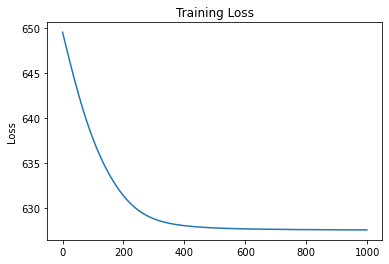

In [25]:
plt.plot(train_error)
plt.ylabel('Loss')
plt.title('Training Loss')

In [26]:
train_error[-1]

627.5730590820312

In [27]:
X_test_t = torch.FloatTensor(X_test)
ypredict = model(X_test_t)

In [28]:
ypredict

tensor([[0.9993],
        [0.9994],
        [0.9986],
        [0.9991],
        [0.9990],
        [0.9989],
        [0.9988],
        [0.9991],
        [0.9993],
        [0.9984],
        [0.9987],
        [0.9989],
        [0.9990],
        [0.9989],
        [0.9991],
        [0.9994],
        [0.9984],
        [0.9987],
        [0.9992],
        [0.9993],
        [0.9990],
        [0.9994],
        [0.9994],
        [0.9982],
        [0.9987],
        [0.9987],
        [0.9988],
        [0.9986],
        [0.9989],
        [0.9990],
        [0.9980],
        [0.9982],
        [0.9989],
        [0.9989],
        [0.9989],
        [0.9990],
        [0.9992],
        [0.9985],
        [0.9986],
        [0.9986],
        [0.9988],
        [0.9984],
        [0.9991],
        [0.9991],
        [0.9985],
        [0.9991],
        [0.9991],
        [0.9991],
        [0.9993],
        [0.9993],
        [0.9993],
        [0.9982],
        [0.9981],
        [0.9989],
        [0.9988],
        [0

In [29]:
ypredict_np = ypredict.detach().numpy()
ypredict_np

array([[0.9992867 ],
       [0.9994337 ],
       [0.9985777 ],
       [0.9991379 ],
       [0.99902797],
       [0.9988919 ],
       [0.9988385 ],
       [0.99907243],
       [0.999295  ],
       [0.9983999 ],
       [0.9986784 ],
       [0.9988543 ],
       [0.99900573],
       [0.9989442 ],
       [0.9991341 ],
       [0.99937636],
       [0.99838555],
       [0.9987196 ],
       [0.9991767 ],
       [0.9992687 ],
       [0.99899584],
       [0.9994124 ],
       [0.9994012 ],
       [0.9981901 ],
       [0.9986681 ],
       [0.9987435 ],
       [0.9987669 ],
       [0.998618  ],
       [0.99888295],
       [0.9990295 ],
       [0.99799925],
       [0.99824667],
       [0.9989073 ],
       [0.99890924],
       [0.99890316],
       [0.99902225],
       [0.9992182 ],
       [0.9985154 ],
       [0.9985648 ],
       [0.99863344],
       [0.99878806],
       [0.9984182 ],
       [0.99911743],
       [0.99911135],
       [0.99849343],
       [0.99907494],
       [0.9990952 ],
       [0.999

In [30]:
y_test

array([[39.33407  ],
       [43.03236  ],
       [35.74735  ],
       [13.99888  ],
       [30.543589 ],
       [44.953682 ],
       [44.594982 ],
       [49.65046  ],
       [42.477493 ],
       [31.092014 ],
       [31.482796 ],
       [46.679157 ],
       [43.12841  ],
       [45.53435  ],
       [53.359676 ],
       [36.559204 ],
       [30.504265 ],
       [25.969069 ],
       [37.52339  ],
       [40.612656 ],
       [34.287086 ],
       [40.79714  ],
       [39.313778 ],
       [39.78917  ],
       [30.58833  ],
       [36.562614 ],
       [32.482693 ],
       [30.605597 ],
       [38.893185 ],
       [51.844585 ],
       [33.023228 ],
       [25.90854  ],
       [23.273962 ],
       [19.544056 ],
       [ 3.2584345],
       [22.290676 ],
       [39.17397  ],
       [33.796547 ],
       [30.866339 ],
       [23.547586 ],
       [10.43587  ],
       [30.676392 ],
       [39.01847  ],
       [27.7297   ],
       [27.149466 ],
       [23.53652  ],
       [33.405018 ],
       [27.48

In [43]:
X_train_t

tensor([[0.0000, 0.2373, 0.6356,  ..., 0.0000, 0.8333, 0.0000],
        [0.0000, 0.1741, 0.7130,  ..., 0.0027, 1.0000, 0.0000],
        [0.0000, 0.3720, 0.2682,  ..., 0.0055, 0.0000, 0.0000],
        ...,
        [0.0000, 0.9554, 0.5402,  ..., 0.9973, 0.3333, 0.0000],
        [0.0000, 0.8336, 0.5040,  ..., 0.0000, 0.5000, 0.0000],
        [0.0000, 0.9158, 0.7576,  ..., 0.0027, 0.6667, 0.0000]])

In [44]:
Y_train_t

tensor([[37.7583],
        [25.9389],
        [11.0749],
        ...,
        [40.4471],
        [46.2554],
        [28.2016]])

* <font color='red'>bas i nije neka predikcija jel da :D<br>
treba mijenjati definirani model, npr hidden_size, broj layera, learning rate...</font>

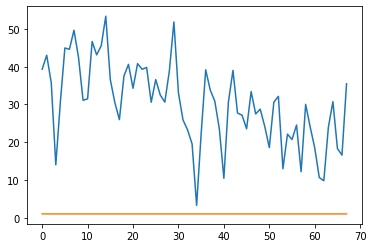

In [31]:
plt.plot(y_test)#_inverse)
plt.plot(ypredict_np)#_inverse)

In [32]:
ypredict_np = y_predicted.detach().numpy()

In [34]:
ypredict_np

array([[0.99794453],
       [0.9980677 ],
       [0.99692637],
       ...,
       [0.99973565],
       [0.9992817 ],
       [0.9993747 ]], dtype=float32)

In [36]:
y_test

array([[39.33407  ],
       [43.03236  ],
       [35.74735  ],
       [13.99888  ],
       [30.543589 ],
       [44.953682 ],
       [44.594982 ],
       [49.65046  ],
       [42.477493 ],
       [31.092014 ],
       [31.482796 ],
       [46.679157 ],
       [43.12841  ],
       [45.53435  ],
       [53.359676 ],
       [36.559204 ],
       [30.504265 ],
       [25.969069 ],
       [37.52339  ],
       [40.612656 ],
       [34.287086 ],
       [40.79714  ],
       [39.313778 ],
       [39.78917  ],
       [30.58833  ],
       [36.562614 ],
       [32.482693 ],
       [30.605597 ],
       [38.893185 ],
       [51.844585 ],
       [33.023228 ],
       [25.90854  ],
       [23.273962 ],
       [19.544056 ],
       [ 3.2584345],
       [22.290676 ],
       [39.17397  ],
       [33.796547 ],
       [30.866339 ],
       [23.547586 ],
       [10.43587  ],
       [30.676392 ],
       [39.01847  ],
       [27.7297   ],
       [27.149466 ],
       [23.53652  ],
       [33.405018 ],
       [27.48

* <font color='red'>ali isprobaj i ovo</font>

In [1]:
# Define network dimensions
input_size = X_train.shape[1]
# Layer size
hidden_size = 1000 # Number of hidden nodes
output_size = 1 # Number of output nodes for prediction

# Build mdel
torch_model = torch.nn.Sequential(torch.nn.Linear(input_size, hidden_size),
                                  torch.nn.ELU(),
                                  torch.nn.Linear(hidden_size, output_size))    
print(torch_model)

NameError: name 'X_train' is not defined

In [38]:
loss_func = torch.nn.MSELoss() #mean square error as loss metric
learning_rate = 0.001
optimizer = torch.optim.Adam(torch_model.parameters(), lr=learning_rate)

In [ ]:
train_error = []
epochs = 2000

#Y_train_t = torch.FloatTensor(y_train).reshape(-1,1) #Converting numpy array to torch tensor

for e in range(epochs):
    #X_train_t = torch.FloatTensor(xtrain)  #Converting numpy array to torch tensor
    
    y_pred = torch_model(X_train_t)
    loss = loss_func(y_pred, Y_train_t)
    loss.backward()
    optimizer.step()
    
    optimizer.zero_grad()

    train_error.append(loss.item())

plt.plot(train_error)
plt.ylabel('Loss')
plt.title('Training Loss')

In [ ]:
ypredict = torch_model(X_test_t)
# Descale
ypredict_np = ypredict.detach().numpy()
#ypredict_inverse = scaler_y.inverse_transform(ypredict_np)
#ytest_inverse = scaler_y.inverse_transform(ytest)

plt.plot(ytest)#_inverse)
plt.plot(ypredict_np)#_inverse)

In [ ]:
print('MSE:', mean_squared_error(ytest, ypredict_np, squared=True))
print(r2_score(ytest, ypredict_np))

* <font color='red'>kako mozemo poboljsati ovaj model?</font>